## Atividade Prática 3
### Nome: João Marcos Alves Modesto Ramos
### Matricula: 3506

In [126]:
import pandas as pd

1. Ler os dados do arquivo “churn-telecom.csv” e fazer uma análise exploratória inicial, para conhecer os atributos

In [127]:
dfChurn = pd.read_csv("churn-telecom.csv")
dfChurn

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [128]:
dfChurn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [129]:
dfChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

2. Aplicar um algoritmo de classificação de sua escolha e calcular a precisão. A variável
alvo para ser classificada é “churn”

In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


trainingFeatures = ['account length', 'area code', 
       'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

resultCol = ['churn']

In [131]:
trainSplit,testSplit = train_test_split(dfChurn, test_size=0.2)
x_train_split,y_train_split = trainSplit[trainingFeatures],trainSplit['churn']
x_train_split


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1759,66,415,35,190.8,100,32.44,261.3,93,22.21,209.5,108,9.43,8.9,6,2.40,0
666,120,415,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
2315,42,415,0,150.7,52,25.62,246.7,96,20.97,103.8,118,4.67,7.0,4,1.89,2
143,103,510,0,246.5,47,41.91,195.5,84,16.62,200.5,96,9.02,11.7,4,3.16,1
738,68,510,0,159.5,123,27.12,240.8,93,20.47,210.3,76,9.46,11.4,3,3.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,128,408,0,158.8,75,27.00,264.8,91,22.51,270.0,77,12.15,7.6,7,2.05,1
1815,101,415,42,209.2,82,35.56,159.7,74,13.57,181.6,100,8.17,9.5,3,2.57,0
2759,130,408,0,115.6,129,19.65,167.8,104,14.26,141.8,124,6.38,12.6,9,3.40,1
439,81,415,0,153.5,99,26.10,197.6,102,16.80,198.5,86,8.93,6.3,2,1.70,2


In [132]:
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_predict

model = [RandomForestClassifier(),LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
scores = {}
for i in model:
    scores[type(i).__name__] = cross_val_score(i,x_train_split,y_train_split,cv=10)
scores = pd.DataFrame.from_dict(scores)
scores

C:\Users\raito\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\raito\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

,RandomForestClassifier,LogisticRegression,SGDClassifier,DecisionTreeClassifier,KNeighborsClassifier,SVC
0,0.921348,0.876404,0.797753,0.883895,0.876404,0.857678
1,0.921348,0.846442,0.857678,0.835206,0.876404,0.857678
2,0.898876,0.857678,0.876404,0.883895,0.872659,0.857678
3,0.921348,0.868914,0.857678,0.883895,0.865169,0.857678
4,0.921348,0.835206,0.168539,0.816479,0.865169,0.857678
5,0.947566,0.865169,0.868914,0.853933,0.891386,0.857678
6,0.924812,0.853383,0.860902,0.883459,0.883459,0.857143
7,0.932331,0.857143,0.868421,0.879699,0.868421,0.857143
8,0.936090,0.868421,0.868421,0.890977,0.879699,0.857143
9,0.898496,0.845865,0.857143,0.860902,0.849624,0.857143


<AxesSubplot:>

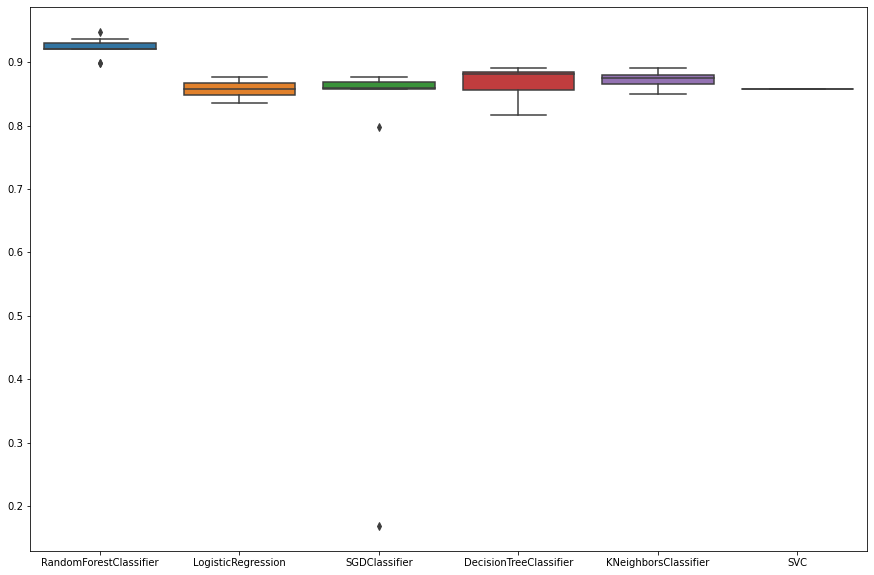

In [133]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,10))
sns.boxplot(data = scores)


In [134]:
from sklearn.metrics import accuracy_score,make_scorer
# Foi testado com o Random Forest e Decision tree, mas ambos deram 1, para fins educativos, vamos usar o SVC
#rfc = RandomForestClassifier()
#rfc.fit(x_train_split,y_train_split)
#y_pred_rfc = rfc.predict(x_train_split)
#accuracy_score(y_train_split,y_pred_rfc)

In [135]:
rfc = SVC()
rfc.fit(x_train_split,y_train_split)
y_pred_rfc = rfc.predict(x_train_split)
accuracy_score(y_train_split,y_pred_rfc)

0.8574643660915229

3. Realizar transformações (arredondamento, tornar binário, binning) em atributos
numéricos que aparentemente podem se beneficiar dessas transformações.

In [136]:
dfChurnEngenharia = dfChurn
dfChurnEngenharia

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [137]:
trainingFeatures = ['account length', 'area code', 
       'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

resultCol = ['churn']

trainingChurn = trainingFeatures+resultCol


In [138]:
dfChurnEngenharia['churn'] = dfChurnEngenharia['churn'].astype(int)
dfChurnEngenharia['churn'].unique()

array([0, 1])

In [139]:
dfChurnEngenharia

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


<AxesSubplot:xlabel='total day minutes', ylabel='Count'>

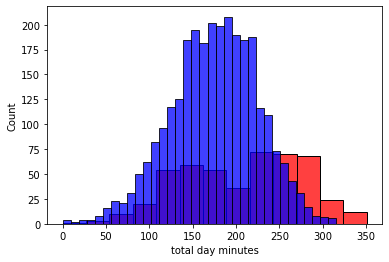

In [140]:
def analisarDF(coluna,churn = 1):
    dfAnalise = dfChurnEngenharia[dfChurnEngenharia.churn == churn]
    color = {1 : 'red',0: 'blue'}
    return sns.histplot(dfAnalise[coluna],color=color[churn])

analisarDF('total day minutes')
analisarDF('total day minutes',0)

<AxesSubplot:xlabel='total day calls', ylabel='Count'>

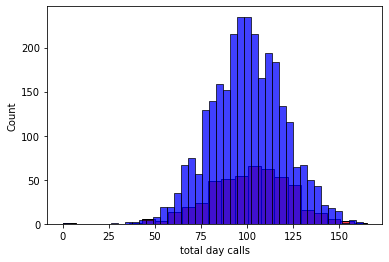

In [141]:
analisarDF('total day calls')
analisarDF('total day calls',0)

<AxesSubplot:xlabel='number vmail messages', ylabel='Count'>

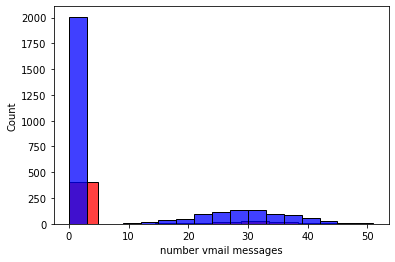

In [142]:
analisarDF('number vmail messages')
analisarDF('number vmail messages',0)

<AxesSubplot:xlabel='total day calls', ylabel='Count'>

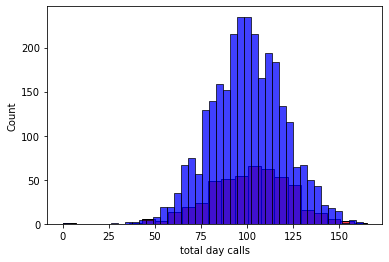

In [143]:
analisarDF('total day calls')
analisarDF('total day calls',0)

## Aplicando a Engenharia nos dados

In [144]:
# Neste passo vamos aplicar a engenharia de dados em vários atributos do conjunto

In [145]:
## Dividindo a coluna total minutes em 4 bins
colunasBins = [
        'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',]
for i in colunasBins:
    print(i)
    dfChurnEngenharia[i] = pd.qcut(dfChurnEngenharia[i], q=4,labels=False)

#dfChurnEngenharia['total day minutes'] = pd.qcut(dfChurnEngenharia['total day minutes'], q=4,labels=False)
#dfChurnEngenharia['total day calls'] = pd.qcut(dfChurnEngenharia['total day calls'], q=3,labels=False)
dfChurnEngenharia

total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,3,...,1,1,3,1,3,1,0,1,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,1,...,2,1,3,2,3,3,0,3,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,3,...,2,0,0,2,0,3,2,3,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,3,...,1,0,1,1,1,0,3,0,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,1,...,3,0,1,3,1,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,1,...,3,2,3,0,3,1,2,1,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,3,...,0,0,1,3,1,1,1,1,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,2,...,0,3,1,1,1,3,2,3,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,2,...,0,0,0,3,0,0,3,0,2,0


In [146]:
existsOrDont = [ 'number vmail messages','total day calls']

for i in existsOrDont:
    dfChurnEngenharia.loc[dfChurnEngenharia[i] < 10,i] =0
    dfChurnEngenharia.loc[dfChurnEngenharia[i] >= 10,i] = 1
dfChurnEngenharia

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,1,265.1,1,3,...,1,1,3,1,3,1,0,1,1,0
1,OH,107,415,371-7191,no,yes,1,161.6,1,1,...,2,1,3,2,3,3,0,3,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,1,3,...,2,0,0,2,0,3,2,3,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,1,3,...,1,0,1,1,1,0,3,0,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,1,1,...,3,0,1,3,1,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,1,156.2,1,1,...,3,2,3,0,3,1,2,1,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,1,3,...,0,0,1,3,1,1,1,1,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,1,2,...,0,3,1,1,1,3,2,3,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,1,2,...,0,0,0,3,0,0,3,0,2,0


In [147]:
dfChurnEngenharia['international plan'].replace(('yes', 'no'), (1, 0), inplace=True)
dfChurnEngenharia['voice mail plan'].replace(('yes', 'no'), (1, 0), inplace=True)
dfChurnEngenharia

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,1,265.1,1,3,...,1,1,3,1,3,1,0,1,1,0
1,OH,107,415,371-7191,0,1,1,161.6,1,1,...,2,1,3,2,3,3,0,3,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,1,3,...,2,0,0,2,0,3,2,3,0,0
3,OH,84,408,375-9999,1,0,0,299.4,1,3,...,1,0,1,1,1,0,3,0,2,0
4,OK,75,415,330-6626,1,0,0,166.7,1,1,...,3,0,1,3,1,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,1,156.2,1,1,...,3,2,3,0,3,1,2,1,2,0
3329,WV,68,415,370-3271,0,0,0,231.1,1,3,...,0,0,1,3,1,1,1,1,3,0
3330,RI,28,510,328-8230,0,0,0,180.8,1,2,...,0,3,1,1,1,3,2,3,2,0
3331,CT,184,510,364-6381,1,0,0,213.8,1,2,...,0,0,0,3,0,0,3,0,2,0


In [148]:
trainingFeatures = ['account length', 'area code', 
       'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

resultCol = ['churn']

trainSplit,testSplit = train_test_split(dfChurnEngenharia, test_size=0.2)
x_train_split,y_train_split = trainSplit[trainingFeatures],trainSplit['churn']
x_train_split

rfc = SVC()
rfc.fit(x_train_split,y_train_split)
y_pred_rfc = rfc.predict(x_train_split)
accuracy_score(y_train_split,y_pred_rfc)

0.8525881470367592

Podemos observar que houve um aumento, portanto, de certa forma, a engenharia foi útil para a melhora!

## Aplicando o mesmo processo no Hearth.csv

In [157]:
dfHearth = pd.read_csv("heart.csv")
dfHearth

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [158]:
dfHearth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [159]:
dfHearth.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [160]:
resultCol = ['target']
trainingFeatures = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

trainSplit,testSplit = train_test_split(dfHearth, test_size=0.2)
x_train_split,y_train_split = trainSplit[trainingFeatures],trainSplit[resultCol]
x_train_split

rfc = SVC()
rfc.fit(x_train_split,y_train_split)
y_pred_rfc = rfc.predict(x_train_split)
accuracy_score(y_train_split,y_pred_rfc)

C:\Users\raito\anaconda3\envs\data_science\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6859504132231405

In [164]:
## Dividindo a coluna total minutes em bins
colunasBins = [
        'age','trestbps','chol','thalach']
for i in colunasBins:
    print(i)
    dfHearth[i] = pd.qcut(dfHearth[i], q=3,labels=False)

dfHearth

chol
thalach


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,3,2,1,1,0,1,0,2.3,0,0,1,1
1,0,1,2,1,1,0,1,2,0,3.5,0,0,2,1
2,0,0,1,1,0,0,0,2,0,1.4,2,0,2,1
3,1,1,1,0,1,0,1,2,0,0.8,2,0,2,1
4,1,0,0,0,2,0,1,2,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,2,1,0,1,0,1,0.2,1,0,3,0
299,0,1,3,0,2,0,1,0,0,1.2,1,0,3,0
300,2,1,0,2,0,1,1,0,0,3.4,1,2,3,0
301,1,1,0,1,0,0,1,0,1,1.2,1,1,3,0


In [165]:
resultCol = ['target']
trainingFeatures = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

trainSplit,testSplit = train_test_split(dfHearth, test_size=0.2)
x_train_split,y_train_split = trainSplit[trainingFeatures],trainSplit[resultCol]
x_train_split

rfc = SVC()
rfc.fit(x_train_split,y_train_split)
y_pred_rfc = rfc.predict(x_train_split)
accuracy_score(y_train_split,y_pred_rfc)

C:\Users\raito\anaconda3\envs\data_science\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8925619834710744

### Essa simples categorização em bins já melhorou um pouco o resultado.